In [644]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [674]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [675]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [694]:
def compute_loss_mse(y, tx, w):
    """Calculate the loss.
    You can calculate the loss using mse or mae.
    """
    y = np.array([y]).T.reshape([len(y), 1])
    w = np.array([w]).T.reshape([len(w), 1])
    
    e = y - np.matmul(tx,w) 
    
    return (1/y.shape[0]) * (e.T.dot(e))


# 2 Grid Search

Fill in the function `grid_search()` below:

In [695]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    
    for i in range(0, w0.shape[0]):
        for j in range(0, w1.shape[0]):
            losses[i, j] = compute_loss_mse(y, tx, np.array([[w0[i]], [w1[j]]]))
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=37.58708203904648, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.117 seconds


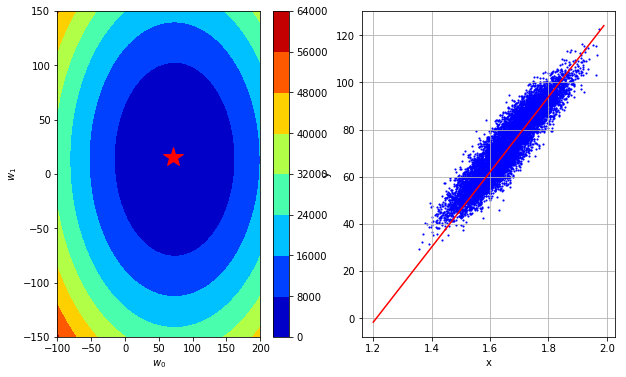

In [696]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [697]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""

    e = y - np.matmul(tx,w)
    return (-1/y.shape[0]) * np.matmul(tx.T, e)

Please fill in the functions `gradient_descent` below:

In [698]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss_mse(y, tx, w)
        grad = compute_gradient(y, tx, w)
        w = w - (gamma * grad)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [700]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/149): loss=[[5584.47342552]], w0=51.30574540147363, w1=9.435798704492253
Gradient Descent(1/149): loss=[[530.60492422]], w0=66.69746902191572, w1=12.266538315839991
Gradient Descent(2/149): loss=[[75.7567591]], w0=71.31498610804836, w1=13.115760199244326
Gradient Descent(3/149): loss=[[34.82042424]], w0=72.70024123388814, w1=13.37052676426563
Gradient Descent(4/149): loss=[[31.1361541]], w0=73.11581777164007, w1=13.446956733772023
Gradient Descent(5/149): loss=[[30.80456979]], w0=73.24049073296565, w1=13.469885724623941
Gradient Descent(6/149): loss=[[30.7747272]], w0=73.27789262136334, w1=13.476764421879516
Gradient Descent(7/149): loss=[[30.77204137]], w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/149): loss=[[30.77179964]], w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/149): loss=[[30.77177789]], w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/149): loss=[[30.77177593]], w0=73.29379216412119, w1=13.479688556082861
Gr

In [701]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=151, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [702]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    
    return compute_gradient(y, tx, w)
    


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
      
    initial_w = initial_w.reshape((2,1))
    
    gen = batch_iter(y, tx, batch_size)
    
    y = []
    tx = []
    for pair in gen:
        y.append(pair[0])
        tx.append(pair[1])
        
    y = np.asarray(y).T
    tx = np.asarray(tx).reshape((10,2))
    
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        loss = compute_loss_mse(y, tx, [w[0], w[1]])
        grad = compute_stoch_gradient(y, tx, [w[0], w[1]])

        w = w - (gamma * grad)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [703]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/149): loss=[[4888.1547836]], w0=[47.4916341], w1=[-12.1194549]
Gradient Descent(1/149): loss=[[1126.46735269]], w0=[57.22878506], w1=[6.98936703]
Gradient Descent(2/149): loss=[[292.64667979]], w0=[67.26141108], w1=[8.35136059]
Gradient Descent(3/149): loss=[[88.8528165]], w0=[70.77807424], w1=[11.92386399]
Gradient Descent(4/149): loss=[[36.45255589]], w0=[73.16260513], w1=[12.80976662]
Gradient Descent(5/149): loss=[[22.6582]], w0=[74.20765921], w1=[13.59232931]
Gradient Descent(6/149): loss=[[18.98903781]], w0=[74.81241157], w1=[13.8886279]
Gradient Descent(7/149): loss=[[18.00872902]], w0=[75.10410686], w1=[14.07862025]
Gradient Descent(8/149): loss=[[17.74631996]], w0=[75.26232242], w1=[14.16468884]
Gradient Descent(9/149): loss=[[17.67602221]], w0=[75.34181811], w1=[14.21338262]
Gradient Descent(10/149): loss=[[17.65718354]], w0=[75.38378855], w1=[14.23720401]
Gradient Descent(11/149): loss=[[17.65213436]], w0=[75.40524497], w1=[14.25000406]
Gradient Descent(12

In [704]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=151, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Gradient Descent(0/149): loss=[[5739.67022907]], w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/149): loss=[[636.5642494]], w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/149): loss=[[177.28471123]], w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/149): loss=[[135.9495528]], w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/149): loss=[[132.22938854]], w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/149): loss=[[131.89457376]], w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/149): loss=[[131.86444042]], w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/149): loss=[[131.86172842]], w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/149): loss=[[131.86148434]], w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/149): loss=[[131.86146238]], w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/149): loss=[[131.8614604]], w0=74.06767464603033, w1=11.0348753

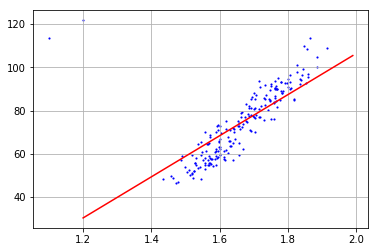

In [705]:
import matplotlib.pyplot as plt

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

plt.scatter(height, weight, marker=".", color='b', s=5)
plt.grid()


# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
w = sgd_ws[-1]
print(w)
def prediction(w0, w1, mean_x, std_x):
    """Get the regression line from the model."""
    x = np.arange(1.2, 2, 0.01)
    x_normalized = (x - mean_x) / std_x
    return x, w0 + w1 * x_normalized

pred_x, pred_y = prediction(
        w[0], w[1],
        mean_x, std_x)
print(pred_x)
print(pred_y)
plt.plot(pred_x, pred_y, 'r')

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [706]:
def compute_loss_mae(y, tx, w):
    y = np.array([y]).T
    w = np.array([w]).T
    
    e = y - np.matmul(tx,w)  
    
    return (1/y.shape[0]) * (np.sum(np.abs(e), axis=0))

In [707]:
def compute_sub_gradient(y, tx, w):
    e = y - np.matmul(tx,w)

    if 0 in np.sign(e):
        print(colored('Non-deferentiable point found!', 'red'))
    
    return (1/y.shape[0]) * (np.sign(e).T).dot(-tx)


In [708]:
def sub_gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y, tx, w)
        grad = compute_sub_gradient(y, tx, w)
        w = w - (gamma * grad)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [709]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
sub_gradient_losses, sub_gradient_ws = sub_gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/149): loss=[74.06780585], w0=0.7, w1=6.109524327590712e-16
Gradient Descent(1/149): loss=[73.36780585], w0=1.4, w1=1.2219048655181425e-15
Gradient Descent(2/149): loss=[72.66780585], w0=2.0999999999999996, w1=1.832857298277214e-15
Gradient Descent(3/149): loss=[71.96780585], w0=2.8, w1=2.443809731036285e-15
Gradient Descent(4/149): loss=[71.26780585], w0=3.5, w1=3.054762163795356e-15
Gradient Descent(5/149): loss=[70.56780585], w0=4.2, w1=3.665714596554428e-15
Gradient Descent(6/149): loss=[69.86780585], w0=4.9, w1=4.276667029313499e-15
Gradient Descent(7/149): loss=[69.16780585], w0=5.6000000000000005, w1=4.887619462072571e-15
Gradient Descent(8/149): loss=[68.46780585], w0=6.300000000000001, w1=5.498571894831642e-15
Gradient Descent(9/149): loss=[67.76780585], w0=7.000000000000001, w1=6.109524327590714e-15
Gradient Descent(10/149): loss=[67.06780585], w0=7.700000000000001, w1=6.720476760349785e-15
Gradient Descent(11/149): loss=[66.36780585], w0=8.4, w1=7.331429193

In [710]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sub_gradient_losses, sub_gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=151, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

Gradient Descent(0/149): loss=[[5739.67022907]], w0=51.84746409844842, w1=7.7244264061924195
Gradient Descent(1/149): loss=[[636.5642494]], w0=67.40170332798297, w1=10.041754328050114
Gradient Descent(2/149): loss=[[177.28471123]], w0=72.06797509684336, w1=10.736952704607411
Gradient Descent(3/149): loss=[[135.9495528]], w0=73.46785662750146, w1=10.945512217574597
Gradient Descent(4/149): loss=[[132.22938854]], w0=73.88782108669889, w1=11.00808007146475
Gradient Descent(5/149): loss=[[131.89457376]], w0=74.01381042445813, w1=11.026850427631798
Gradient Descent(6/149): loss=[[131.86444042]], w0=74.0516072257859, w1=11.032481534481914
Gradient Descent(7/149): loss=[[131.86172842]], w0=74.06294626618423, w1=11.034170866536945
Gradient Descent(8/149): loss=[[131.86148434]], w0=74.06634797830372, w1=11.034677666153454
Gradient Descent(9/149): loss=[[131.86146238]], w0=74.06736849193958, w1=11.034829706038408
Gradient Descent(10/149): loss=[[131.8614604]], w0=74.06767464603033, w1=11.0348753

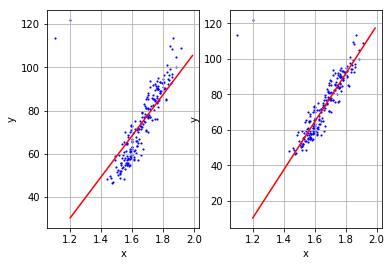

In [711]:
# compare gradient and sub_gradient decents
import matplotlib.pyplot as plt

height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)


fig = plt.figure()

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(height, weight, marker=".", color='b', s=5)
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.grid()

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(height, weight, marker=".", color='b', s=5)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.grid()



# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

def prediction(w0, w1, mean_x, std_x):
    """Get the regression line from the model."""
    x = np.arange(1.2, 2, 0.01)
    x_normalized = (x - mean_x) / std_x
    return x, w0 + w1 * x_normalized

# Start GD.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
wgd = gd_ws[-1]

pred_x, pred_y = prediction(
        wgd[0], wgd[1],
        mean_x, std_x)

ax1.plot(pred_x, pred_y, 'r')

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = sub_gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()
wsgd = sgd_ws[-1]

pred_x, pred_y = prediction(
        wsgd[0], wsgd[1],
        mean_x, std_x)

ax2.plot(pred_x, pred_y, 'r')

Stochastic Sub_Gradiant_Descent with MAE

In [712]:
def compute_stoch_sub_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    
    return compute_sub_gradient(y, tx, w)
    


def stochastic_sub_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
      
    gen = batch_iter(y, tx, batch_size)
    
    y = []
    tx = []
    for pair in gen:
        y.append(pair[0])
        tx.append(pair[1])
        
    y = np.asarray(y).T.reshape(10)
    tx = np.asarray(tx).reshape((10,2))
    
    ws = [initial_w]
    losses = []
    w = initial_w
    
    for n_iter in range(max_iters):
        loss = compute_loss_mae(y, tx, w)
        grad = compute_stoch_sub_gradient(y, tx, w)

        w = w - (gamma * grad)
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    return losses, ws

In [713]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 150
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
ssgd_losses, ssgd_ws = stochastic_sub_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/149): loss=[76.75295318], w0=0.7, w1=0.14090366446838562
Gradient Descent(1/149): loss=[76.02459054], w0=1.4, w1=0.28180732893677124
Gradient Descent(2/149): loss=[75.29622791], w0=2.0999999999999996, w1=0.42271099340515683
Gradient Descent(3/149): loss=[74.56786528], w0=2.8, w1=0.5636146578735425
Gradient Descent(4/149): loss=[73.83950265], w0=3.5, w1=0.7045183223419281
Gradient Descent(5/149): loss=[73.11114001], w0=4.2, w1=0.8454219868103138
Gradient Descent(6/149): loss=[72.38277738], w0=4.9, w1=0.9863256512786994
Gradient Descent(7/149): loss=[71.65441475], w0=5.6000000000000005, w1=1.127229315747085
Gradient Descent(8/149): loss=[70.92605212], w0=6.300000000000001, w1=1.2681329802154706
Gradient Descent(9/149): loss=[70.19768949], w0=7.000000000000001, w1=1.4090366446838563
Gradient Descent(10/149): loss=[69.46932685], w0=7.700000000000001, w1=1.549940309152242
Gradient Descent(11/149): loss=[68.74096422], w0=8.4, w1=1.6908439736206275
Gradient Descent(12/149):

In [714]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        ssgd_losses, ssgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=151, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>